<a href="https://colab.research.google.com/github/jakkamlavanya/awt-f/blob/main/ML_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/ml/train.csv") # Changed the path to include the filename

In [6]:
# Select relevant features (GrLivArea: square footage, BedroomAbvGr: bedrooms, FullBath & HalfBath: bathrooms)
data['TotalBath'] = data['FullBath'] + 0.5 * data['HalfBath']
features = data[['GrLivArea', 'BedroomAbvGr', 'TotalBath']]
target = data['SalePrice']

In [7]:
# Handle missing values
features = features.fillna(features.mean())

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [9]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [12]:
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 36569.64442787399
R-squared: 0.6286307301050608


In [13]:
# Display feature importance
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coefficients)

        Feature   Coefficient
0     GrLivArea    100.636895
1  BedroomAbvGr -26645.532516
2     TotalBath  27083.207713


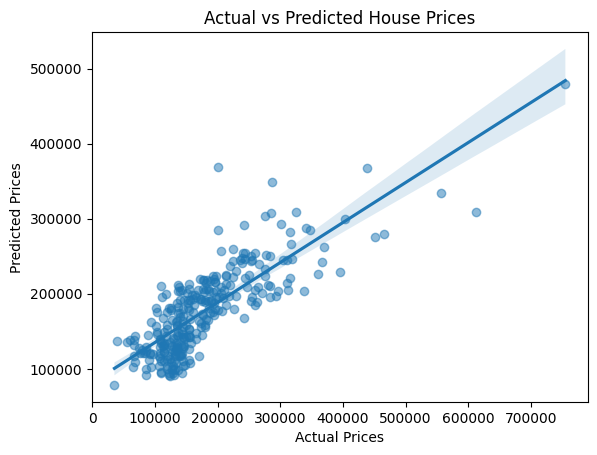

In [14]:
# Visualization
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()